<a href="https://colab.research.google.com/github/Josep-at-work/curso-series-temporales/blob/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/1_Python_Introducci%C3%B3n_a_las_series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Packages

In [1]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing the Data

The course data has been commented in order to use the telemetry data. From now on this will be the *modus operantis*, so that both  datasets are available.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/Josep-at-work/curso-series-temporales/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/Index2018.csv")
raw_csv_data = pd.read_csv("/content/drive/MyDrive/Udemy/Series Temporales/Data/telemetry.csv")

In [8]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [9]:
df_comp.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,1/1/2015 6:00:00 AM,1,176.217853,418.504078,113.077935,45.087686
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511


In [10]:
df_comp

,datetime,machineID,volt,rotate,pressure,vibration
0,1/1/2015 6:00:00 AM,1,176.217853,418.504078,113.077935,45.087686
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,1/1/2016 2:00:00 AM,100,179.438162,395.222827,102.290715,50.771941
876096,1/1/2016 3:00:00 AM,100,189.617555,446.207972,98.180607,35.123072
876097,1/1/2016 4:00:00 AM,100,192.483414,447.816524,94.132837,48.314561
876098,1/1/2016 5:00:00 AM,100,165.475310,413.771670,104.081073,44.835259


In [11]:
df_comp.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [12]:
df_comp.isna()

,datetime,machineID,volt,rotate,pressure,vibration
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
876095,False,False,False,False,False,False
876096,False,False,False,False,False,False
876097,False,False,False,False,False,False
876098,False,False,False,False,False,False


In [13]:
df_comp.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [ ]:
# df_comp.volt.isna().sum() # to examine a particular variable

0

### Plotting the Data

In [32]:
m1 = df_comp[df_comp.machineID == 1]
m2 = df_comp[df_comp.machineID == 2].reset_index()

      index              datetime  machineID  ...      rotate    pressure  vibration
0      8761   1/1/2015 6:00:00 AM          2  ...  424.624162   76.005332  43.767049
1      8762   1/1/2015 7:00:00 AM          2  ...  432.372960  110.907806  37.267114
2      8763   1/1/2015 8:00:00 AM          2  ...  454.629639   97.877007  39.709461
3      8764   1/1/2015 9:00:00 AM          2  ...  438.391022   84.440430  40.490443
4      8765  1/1/2015 10:00:00 AM          2  ...  473.055664  110.395683  41.229578
...     ...                   ...        ...  ...         ...         ...        ...
8756  17517   1/1/2016 2:00:00 AM          2  ...  417.062339   86.021068  40.792375
8757  17518   1/1/2016 3:00:00 AM          2  ...  479.380172  101.744819  39.156569
8758  17519   1/1/2016 4:00:00 AM          2  ...  470.612496   85.709946  34.862975
8759  17520   1/1/2016 5:00:00 AM          2  ...  493.760668   93.547606  51.932874
8760  17521   1/1/2016 6:00:00 AM          2  ...  392.270187   9

In [14]:
import matplotlib.pyplot as plt

In [20]:
m1.iloc[1:400]

,datetime,machineID,volt,rotate,pressure,vibration
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511
5,1/1/2015 11:00:00 AM,1,172.504839,430.323362,95.927042,35.655017
...,...,...,...,...,...,...
95,1/5/2015 5:00:00 AM,1,177.510419,469.787301,100.498426,59.577251
96,1/5/2015 6:00:00 AM,1,179.303153,499.777962,111.833028,52.383097
97,1/5/2015 7:00:00 AM,1,155.511452,498.398435,103.068134,33.270415
98,1/5/2015 8:00:00 AM,1,172.439821,392.124959,108.135159,39.477497


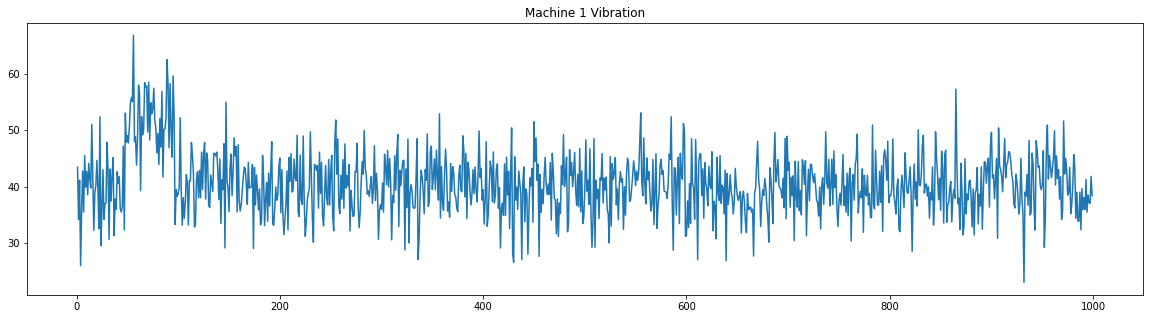

In [23]:
m1.iloc[1:1000].vibration.plot(figsize=(20,5), title = "Machine 1 Vibration")
plt.show()

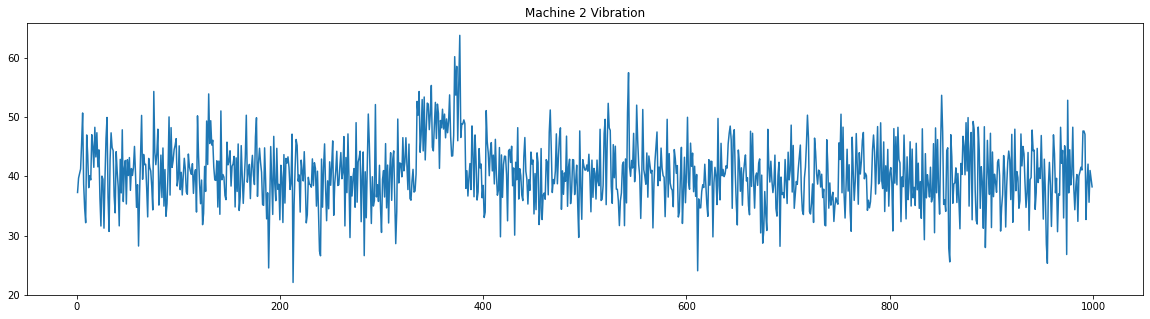

In [33]:
m2.iloc[1:1000].vibration.plot(figsize=(20,5), title = "Machine 2 Vibration")
plt.show()

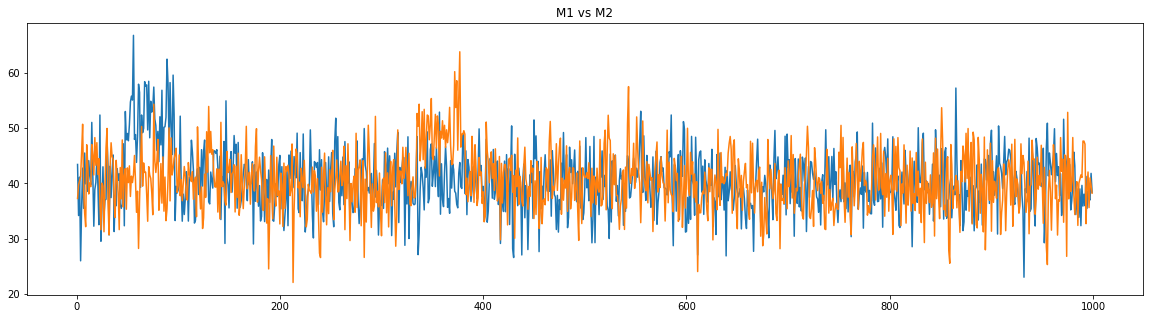

In [34]:
# Define two plots in the different cell to display them both in the same plot.
m1.iloc[1:1000].vibration.plot(figsize=(20,5), title = "S&P500 Prices")
m2.iloc[1:1000].vibration.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("M1 vs M2")
plt.show()

### The QQ Plot

In [35]:
import scipy.stats

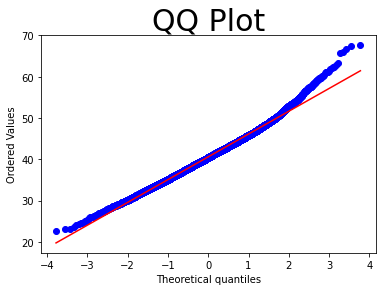

In [36]:
scipy.stats.probplot(m1.vibration, plot =  plt)
plt.title("QQ Plot", size = 30)
plt.show()

Ordena todos los valores que toma una variable de mayor a menor. Los valores están representados en el eje Y. El eje X representa cuan alejados están los valores de la media, lo mide mediante desviaciones estandard.

La linia roja representa lo que sería una distribución normal.